# Image segmentation with OpenCV

In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

#### 1. Load the images 'Battery/BAT0001.PNG' and 'Oil Filter/OilFilt1.jpg' (`im1` and `im2`) and show them in a figure.

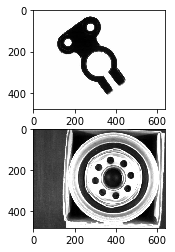

In [4]:
im1 = cv2.imread('../Images/Battery/BAT0001.PNG', 0)
im2 = cv2.imread('../Images/Oil Filter/OilFilt1.jpg', 0)

plt.figure(0)
plt.subplot(2, 1, 1), plt.imshow(im1, 'gray')
plt.subplot(2, 1, 2), plt.imshow(im2, 'gray')
plt.show()

#### 2. Use the function cv2.HoughCircles() to detect circles in the images `im1` and `im2`.

Unfortunately, the Hough technique to find circles depends of a great number of parameters to make the algorithm both accurate and fast. You need to tune the parameters until you find an useful result.

In [5]:
circles = cv2.HoughCircles(im1, cv2.HOUGH_GRADIENT, 1, 40, param1=50, param2=60, minRadius=0, maxRadius=0)

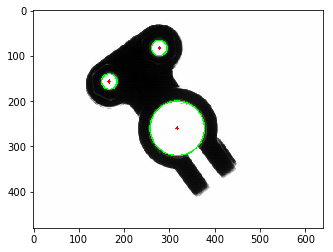

In [6]:
cim1 = cv2.cvtColor(im1, cv2.COLOR_GRAY2RGB)

for i in circles[0, :]:
    cv2.circle(cim1, (i[0], i[1]), i[2], (0, 255, 0), 2) # draw the circle in green
    cv2.circle(cim1, (i[0], i[1]), 2, (255, 0, 0), 3) # draw the center in red

plt.figure(1)
plt.imshow(cim1)
plt.show()

However, the same parameters won't work for different types of images. **Note**: this will take a while.

In [7]:
circles = cv2.HoughCircles(im2, cv2.HOUGH_GRADIENT, 1, 40, param1=50, param2=60, minRadius=0, maxRadius=0)

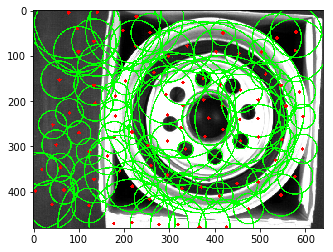

In [8]:
cim2 = cv2.cvtColor(im2, cv2.COLOR_GRAY2RGB)

for i in circles[0, :]:
    cv2.circle(cim2, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(cim2, (i[0], i[1]), 2, (255, 0, 0), 3)

plt.figure(2)
plt.imshow(cim2)
plt.show()

In order to find a concrete type of circles, we need to know its radius. We can obtain it using `plt.ginput` and the euclidean distance formula.

In [9]:
%matplotlib tk

plt.figure()
plt.imshow(im2, 'gray')
[p1, p2] = plt.ginput(2)
print(p1, p2)

diam = np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
radius = (diam/2).astype(np.int32)
print("The radius selected is", radius)

/home/solano/anaconda3/envs/opencv/lib/python3.6/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


(445.47402597402595, 150.6688311688311) (435.08441558441564, 177.94155844155836)
The radius selected is 14


In [10]:
circles = cv2.HoughCircles(im2, cv2.HOUGH_GRADIENT, 1, 10, param1=50, param2=20, minRadius=radius-3, maxRadius=radius+3)

print("The algorithm has detected {} circles of radius {}.".format(len(circles[0]), radius))

The algorithm has detected 7 circles of radius 14.


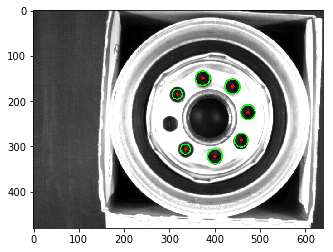

In [11]:
%matplotlib inline

cim2 = cv2.cvtColor(im2, cv2.COLOR_GRAY2RGB)

for i in circles[0, :]:
    cv2.circle(cim2, (i[0], i[1]), i[2], (0, 255, 0), 2)
    cv2.circle(cim2, (i[0], i[1]), 2, (255, 0, 0), 3)

plt.figure(3)
plt.imshow(cim2)
plt.show()

#### 3. Load the image 'Gears/Parts 01.jpg' (`im3`) and employ the function `cv2.threshold`  to obtain a binarized image.

Use `th, im_th = cv2.threshold(im, th, 255, method)`, where `th` is the threshold. We will use the `cv2.THRESH_BINARY` method for basic thresholding and the `cv2.THRESH_OTSU` method for optimal thresholding.

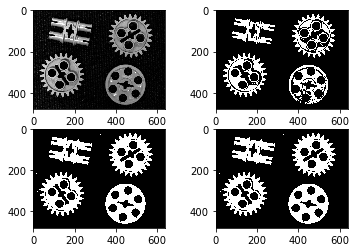

In [51]:
im3 = cv2.imread('../Images/Gears/Parts 01.jpg', 0)

# basic thresholding
_, im3_gth = cv2.threshold(im3, 127, 255, cv2.THRESH_BINARY)

# otsu (optimal) thresholding
# outputs: optimal threshold and the thresholded image
oth, im3_oth = cv2.threshold(im3, 0, 255, cv2.THRESH_OTSU)

# basic thresholding with optimal threshold
_, im3_oth_2 = cv2.threshold(im3, oth, 255, cv2.THRESH_BINARY)

plt.figure(4)
plt.subplot(2, 2, 1), plt.imshow(im3, 'gray')
plt.subplot(2, 2, 2), plt.imshow(im3_gth, 'gray')
plt.subplot(2, 2, 3), plt.imshow(im3_oth, 'gray')
plt.subplot(2, 2, 4), plt.imshow(im3_oth_2, 'gray')
plt.show()

#### 4. Show the original image, its histogram with a `*` marking the optimal threshold and the binarized image.

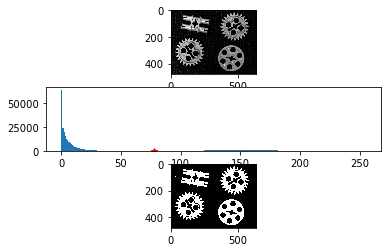

In [54]:
plt.figure(5)
plt.subplot(3, 1, 1), plt.imshow(im3, 'gray')
plt.subplot(3, 1, 2), plt.hist(im3.ravel(), 256, [0, 255]), plt.plot(oth, 0, 'r*')
plt.subplot(3, 1, 3), plt.imshow(im3_oth, 'gray')
plt.show()

#### 5.

In [53]:
# No function found

0

#### 6.

In [ ]:
# No function found

#### 7. Load the image 'Classification/Parts00.png' (`im7`) and use `cv2.connectedComponents()` to segment all the objects contained in the image, which has been binarized previously (`im7b`). The labeled image will be `im7L`. How many objects appear?

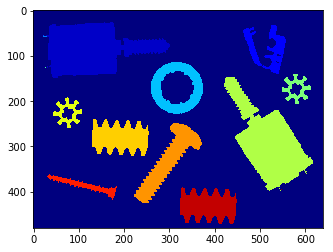

In [55]:
im7 = cv2.imread('../Images/Classification/Parts00.png', 0)

_, im7b = cv2.threshold(im7, 0, 255, cv2.THRESH_OTSU)
im7b = cv2.bitwise_not(im7b)

connectivity = 4
_, im7L = cv2.connectedComponents(im7b, connectivity)

plt.figure(6)
plt.imshow(im7L, cmap='jet') # colormaps: https://matplotlib.org/users/colormaps.html
plt.show()

In [56]:
print(im7L.max())

16


It seems that the algorithm has found 16 different objects plus the background. However, there are only 10 different objects in the image. Why is that?

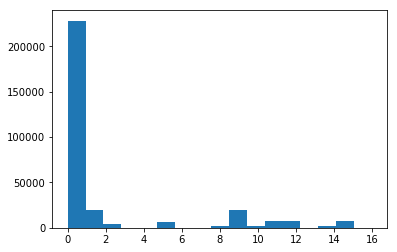

In [57]:
plt.figure(7)
plt.hist(im7L.ravel(), 17, [0, 16])
plt.show()

In the histogram we see that there are six labels (3, 4, 6, 7, 13 and 16) that cover only a few pixels in the image. Let's treat them only as noise.

#### 8. Show a figure for each one of the segmented objects if its area is greater than 20 pixels. Mark with a `*` the centroid of the object.

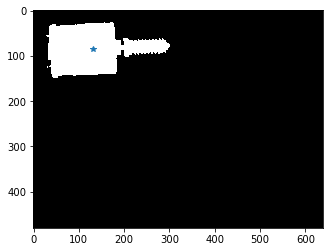

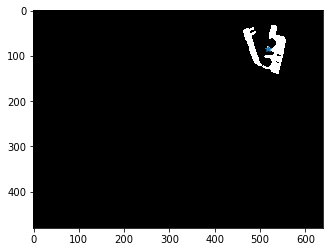

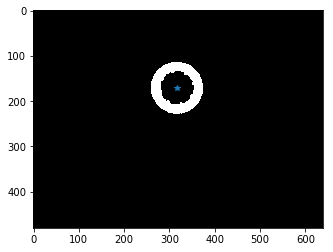

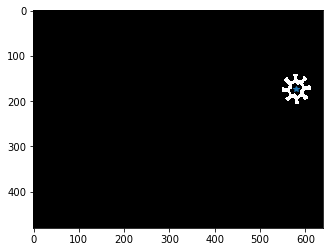

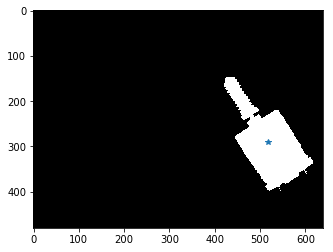

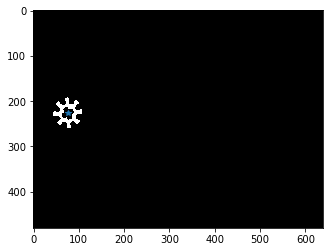

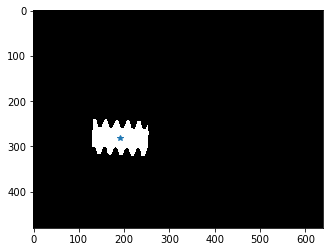

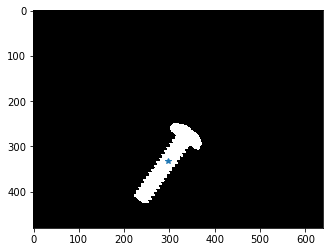

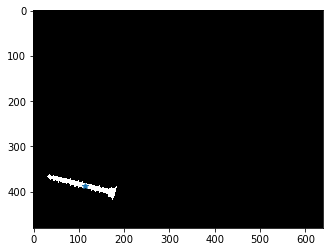

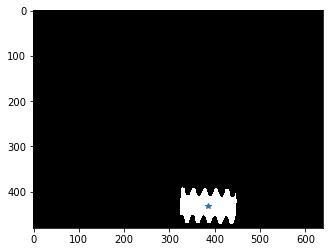

In [59]:
for k in range(1, im7L.max()+1):
    ob = (im7L == k).astype(np.uint8)
    
    # if area > 20
    if ob.sum() > 20: 
        
        # centroids
        xy = np.argwhere(ob == 1)
        x = xy[:, 0]
        y = xy[:, 1]
        
        cx = np.mean(x)
        cy = np.mean(y)
            
        plt.figure()
        plt.imshow(ob, 'gray')
        plt.plot(cy, cx, '*')

#### 9. Load the image 'Connector/Connector 01.jpg' and define two regions of interest as rectangles R1 and R2 that contains pins from 1 to 5 and from 6 to 9, respectively.

/home/solano/anaconda3/envs/opencv/lib/python3.6/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


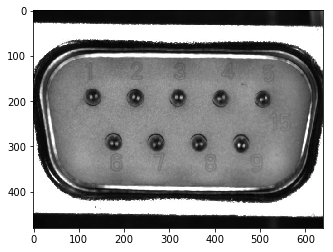

In [60]:
im8 = cv2.imread('../Images/Connector/Connector 01.jpg') # BGR image will allow us to draw a red rectangle
im8g = cv2.cvtColor(im8, cv2.COLOR_BGR2GRAY)

%matplotlib tk
plt.imshow(im8g, 'gray')
[v1_1, v1_2] = plt.ginput(2) # 2 vertices for the first region
[v2_1, v2_2] = plt.ginput(2) # 2 vertices for the second region

In [61]:
import matplotlib.patches as patches

In [62]:
d1_x = np.abs(v1_1[0] - v1_2[0])
d1_y = np.abs(v1_1[1] - v1_2[1])

d2_x = np.abs(v2_1[0] - v2_2[0])
d2_y = np.abs(v2_1[1] - v2_2[1])

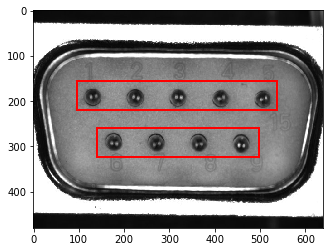

In [64]:
%matplotlib inline

fig, ax = plt.subplots(1)
ax.imshow(im8)
R1 = patches.Rectangle((v1_1[0], v1_1[1]), d1_x, d1_y, linewidth=2, edgecolor='r', facecolor='none', fill=False)
R2 = patches.Rectangle((v2_1[0], v2_1[1]), d2_x, d2_y, linewidth=2, edgecolor='r', facecolor='none', fill=False)
ax.add_patch(R1)
ax.add_patch(R2)

plt.show()

#### 10. Localize the regions through their four vertices.

In [65]:
verts_R1 = np.array([v1_1, (v1_2[0], v1_1[1]), v1_2, (v1_1[0], v1_2[1])]).astype(np.int32)
verts_R2 = np.array([v2_1, (v2_2[0], v2_1[1]), v2_2, (v2_1[0], v2_2[1])]).astype(np.int32)

#### 11. Create three binary masks (`mask_R1`, `mask_R2` and `mask_R3`) to pixels of the region `R1`, `R2` and both together. Show the image `im8` masked with `mask_R3`.

In [66]:
mask_R1 = np.zeros_like(im8g)
mask_R2 = np.zeros_like(im8g)

cv2.fillPoly(mask_R1, [verts_R1], 255)
cv2.fillPoly(mask_R2, [verts_R2], 255)

mask_R3 = mask_R1 + mask_R2

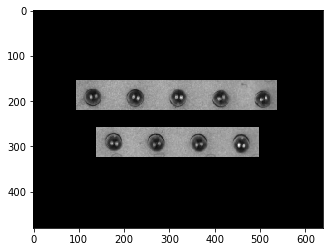

In [67]:
masked_image = cv2.bitwise_and(im8g, mask_R3, 255)

plt.figure(8)
plt.imshow(masked_image, 'gray')
plt.show()